In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Conv2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [2]:
train = ImageDataGenerator(validation_split=0.2)

train_path = 'Dataset/'

In [3]:
training_data = train.flow_from_directory(train_path,
                                          target_size=(150, 150),
                                          class_mode='binary',
                                          color_mode="grayscale",
                                          subset="training")

Found 22048 images belonging to 2 classes.


In [4]:
validation_data = train.flow_from_directory(train_path,
                                          target_size=(150, 150),
                                          class_mode='binary',  
                                          color_mode="grayscale",
                                          subset="validation")

Found 5510 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [8]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [9]:
history = model.fit_generator(
        generator=training_data,
        epochs=20,
        steps_per_epoch=len(training_data),
        validation_steps=len(validation_data),
        validation_data=validation_data
        )

/opt/anaconda3/envs/akshit_venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
689/689 [==============================] - 1076s 2s/step - loss: 0.7833 - accuracy: 0.7153 - val_loss: 0.2851 - val_accuracy: 0.9116
Epoch 2/20
689/689 [==============================] - 947s 1s/step - loss: 0.1639 - accuracy: 0.9448 - val_loss: 0.2941 - val_accuracy: 0.9212
Epoch 3/20
689/689 [==============================] - 938s 1s/step - loss: 0.1384 - accuracy: 0.9568 - val_loss: 0.2838 - val_accuracy: 0.9102
Epoch 4/20
689/689 [==============================] - 940s 1s/step - loss: 0.1352 - accuracy: 0.9567 - val_loss: 0.2580 - val_accuracy: 0.9143
Epoch 5/20
689/689 [==============================] - 954s 1s/step - loss: 0.1223 - accuracy: 0.9611 - val_loss: 0.1567 - val_accuracy: 0.9456
Epoch 6/20
689/689 [==============================] - 951s 1s/step - loss: 0.1186 - accuracy: 0.9609 - val_loss: 0.3548 - val_accuracy: 0.8648
Epoch 7/20
689/689 [==============================] - 956s 1s/step - loss: 0.1152 - accuracy: 0.9617 - val_loss: 0.5752 - val_accuracy: 0.564

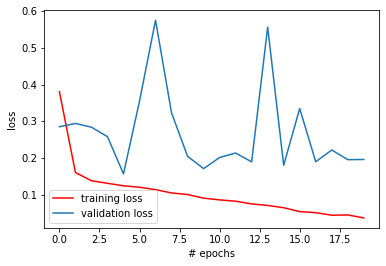

In [10]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

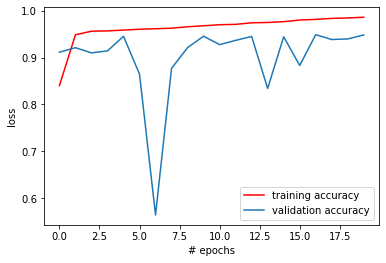

In [11]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
model.save('malaria_model.h5')